In [284]:
import numpy as np
import pandas as pd
import cufflinks as cf
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

init_notebook_mode(connected=True)
cf.go_offline()
%config Completer.use_jedi = False

import requests
from bs4 import BeautifulSoup
import json

# 爬取COVID資料

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live Update: 215,160,401 Cases and 4,482,971 Deaths from the Coronavirus - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link hr
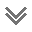

In [285]:
url = requests.get('https://www.worldometers.info/coronavirus/')
soup = BeautifulSoup(url.text,'html.parser')
print(soup.prettify())

# 過濾資訊

In [286]:
main_data = soup.find_all('div',class_='maincounter-number')
print(data,'\n')
print('Infected Cases:',main_data[0].text.strip())
print('Death Cases:',main_data[1].text.strip())
print('Recover Cases:',main_data[2].text.strip())

<re.Match object; span=(24619, 24700), match='China|94,707|20|4,636||88,496|79|1,575|14|66|3|16> 

Infected Cases: 215,160,401
Death Cases: 4,482,971
Recover Cases: 192,462,165


In [287]:
# 抓出每日人數、日期...大量資料
data = soup.find_all('script',{'type':'text/javascript'})
for i in data:
    print(i) # 保留xAxis,main_table_countries

<script src="https://cdn.datatables.net/1.10.19/js/jquery.dataTables.min.js" type="text/javascript"></script>
<script src="https://cdn.datatables.net/1.10.19/js/dataTables.bootstrap.min.js" type="text/javascript"></script>
<script class="init" type="text/javascript">
		$.extend( $.fn.dataTable.defaults, {
    responsive: true
} );
	
	$(document).ready(function() {
    $('#example2').dataTable( {
        "scrollCollapse": true,
		"sDom": '<"bottom"flp><"clear">',
        "paging":         false
    } );
} );
	</script>
<script class="init" type="text/javascript">
		$.extend( $.fn.dataTable.defaults, {
    responsive: true
} );
	
	$(document).ready(function() {
    $('#table3').dataTable( {
        "scrollCollapse": true,
				 "order": [[ 1, 'desc' ]],
		"sDom": '<"bottom"flp><"clear">',
        "paging":         false
    } );
} );
	</script>
<script class="init" type="text/javascript">
		$.extend( $.fn.dataTable.defaults, {
    responsive: true
} );
	
	$(document).ready(function() {
  

In [288]:
table = soup.find(id='main_table_countries_today')
table_content = table.find_all('td')
table_content

[<td></td>,
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>,
 <td>47,005,570</td>,
 <td>+59,176</td>,
 <td>982,452</td>,
 <td>+1,349</td>,
 <td>37,191,068</td>,
 <td>+29,997</td>,
 <td>8,832,050</td>,
 <td>31,874</td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td data-continent="North America" style="display:none;">North America</td>,
 <td>
 </td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td style="text-align:left;">
 <nobr>Asia</nobr>
 </td>,
 <td>68,858,884</td>,
 <td>+268,131</td>,
 <td>1,015,586</td>,
 <td>+4,315</td>,
 <td>64,126,302</td>,
 <td>+259,912</td>,
 <td>3,716,996</td>,
 <td>41,326</td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td data-continent="Asia" style="display:none;">Asia</td>,
 <td>
 </td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td style="text-align:left;">
 <nobr>South America</nobr>
 </td>,
 <td>36,724,610</td>,
 <td>+1,467</td>,
 <td>1

In [289]:
# remove all tag text
cleaned_table = ''
for data in table_content:
    cleaned_table += data.text.strip() + '|'
    cleaned_table = cleaned_table.replace('+','')
    cleaned_table = cleaned_table.replace('N/A','0')
cleaned_table   

'|North America|47,005,570|59,176|982,452|1,349|37,191,068|29,997|8,832,050|31,874||||||North America||||||||Asia|68,858,884|268,131|1,015,586|4,315|64,126,302|259,912|3,716,996|41,326||||||Asia||||||||South America|36,724,610|1,467|1,124,574|80|34,508,425|1,325|1,091,611|23,608||||||South America||||||||Europe|54,709,818|108,734|1,165,827|1,363|49,737,696|127,556|3,806,295|10,967||||||Europe||||||||Africa|7,705,933|14,806|192,481|288|6,785,757|15,928|727,695|4,617||||||Africa||||||||Oceania|154,865|1,603|2,036|12|112,211|230|40,618|233||||||Australia/Oceania|||||||||721||15||706||0|0||||||||||||||World|215,160,401|453,917|4,482,971|7,407|192,462,165|434,948|18,215,265|112,625|27,603|575.1||||All|||||||1|USA|39,182,953|25,704|649,867|187|30,680,434|2,151|7,852,652|24,676|117,585|1,950|573,911,810|1,722,265|333,230,770|North America|9|513|1|77|0.6|23,565|2|India|32,602,290|44,523|436,889|493|31,813,778|32,732|351,623|8,944|23,361|313|513,129,378|367,685|1,395,568,473|Asia|43|3,194|3|32|

In [290]:
import re
countries = [
    'usa', 'spain', 'italy', 'france', 'germany', 'uk', 'turkey', 'iran', 
    'russia', 'brazil', 'canada', 'belgium', 'netherlands', 'switzerland', 
    'india', 'peru', 'portugal', 'ecuador', 'ireland', 'sweden', 'saudi-arabia', 
    'israel', 'austria', 'mexico', 'singapore', 'japan', 'chile', 'pakistan', 
    'poland', 'romania', 'belarus', 'qatar', 'south-korea', 'united-arab-emirates', 
    'indonesia', 'ukraine', 'denmark', 'serbia', 'philippines', 'norway', 
    'czech-republic', 'australia', 'dominican-republic', 'bangladesh', 'malaysia', 
    'panama', 'colombia', 'finland', 'south-africa', 'egypt', 'morocco', 'argentina', 
    'luxembourg', 'moldova', 'algeria', 'kuwait', 'thailand', 'kazakhstan', 
    'bahrain', 'hungary', 'greece', 'oman', 'croatia', 'uzbekistan', 'iraq', 
    'armenia', 'iceland', 'afghanistan', 'estonia', 'azerbaijan', 'cameroon', 
    'bosnia-and-herzegovina', 'ghana', 'new-zealand', 'lithuania', 'slovenia', 
    'macedonia', 'slovakia', 'cuba', 'bulgaria', 'nigeria', 'cote-d-ivoire', 
    'china-hong-kong-sar', 'djibouti', 'guinea', 'bolivia', 'tunisia', 'latvia', 
    'cyprus', 'andorra', 'albania', 'lebanon', 'niger', 'kyrgyzstan', 'costa-rica', 
    'senegal', 'honduras', 'burkina-faso', 'uruguay', 'sri-lanka', 'san-marino', 
    'channel-islands', 'guatemala', 'georgia', 'democratic-republic-of-the-congo', 
    'malta', 'jordan', 'somalia', 'taiwan', 'reunion', 'mayotte', 'mali', 'kenya', 
    'jamaica', 'state-of-palestine', 'mauritius', 'venezuela', 'el-salvador', 
    'montenegro', 'isle-of-man', 'tanzania', 'viet-nam', 'equatorial-guinea', 
    'sudan', 'paraguay', 'maldives', 'congo', 'rwanda', 'faeroe-islands', 'gabon', 
    'martinique', 'guadeloupe', 'myanmar', 'gibraltar', 'brunei-darussalam', 
    'liberia', 'ethiopia', 'madagascar', 'cambodia', 'trinidad-and-tobago', 
    'french-guiana', 'bermuda', 'cabo-verde', 'aruba', 'togo', 'monaco', 
    'sierra-leone', 'zambia', 'liechtenstein', 'bahamas', 'barbados', 'uganda', 
    'mozambique', 'sint-maarten', 'guyana', 'haiti', 'cayman-islands', 'benin', 
    'libya', 'swaziland', 'french-polynesia', 'guinea-bissau', 'nepal', 'chad', 
    'china-macao-sar', 'syria', 'eritrea', 'saint-martin', 'mongolia', 'malawi', 
    'zimbabwe', 'angola', 'antigua-and-barbuda', 'timor-leste', 'botswana', 
    'central-african-republic', 'laos', 'belize', 'fiji', 'grenada', 'new-caledonia', 
    'curacao', 'dominica', 'namibia', 'saint-kitts-and-nevis', 'saint-lucia', 
    'saint-vincent-and-the-grenadines', 'nicaragua', 'falkland-islands-malvinas', 
    'burundi', 'montserrat', 'turks-and-caicos-islands', 'greenland', 'seychelles', 
    'gambia', 'suriname', 'holy-see', 'papua-new-guinea', 'mauritania', 'bhutan', 
    'british-virgin-islands', 'saint-barthelemy', 'south-sudan', 'western-sahara', 
    'caribbean-netherlands', 'sao-tome-and-principe', 'anguilla', 'saint-pierre-and-miquelon', 
    'yemen', 'china'
]

In [291]:
for country in countries:
    pattern = country + '[,|\d]*'
    data = re.search(pattern,cleaned_table,re.IGNORECASE)
    if data is not None:
        print(data.group()) # group()回傳所有符合的data
    

USA|39,182,953|25,704|649,867|187|30,680,434|2,151|7,852,652|24,676|117,585|1,950|573,911,810|1,722,265|333,230,770|
Spain|4,822,320|7,115|83,861|171|4,237,823|20,379|500,636|1,701|103,095|1,793|60,618,810|1,295,950|46,775,584|
Italy|4,509,611|7,221|128,957|43|4,243,597|5,839|137,057|503|74,712|2,136|82,836,243|1,372,378|60,359,657|
France|6,673,336||113,665||6,120,211||439,460|2,128|101,977|1,737|121,518,857|1,856,968|65,439,407|
Germany|3,908,148|6,284|92,585|13|3,714,400|3,900|101,163|869|46,475|1,101|68,329,706|812,563|84,091,604|
UK|6,628,709|38,281|132,143|140|5,251,174|54,034|1,245,392|974|97,059|1,935|265,689,435|3,890,297|68,295,411|
Turkey|6,293,297|19,616|55,469|257|5,771,611|15,205|466,217|633|73,709|650|74,984,790|878,248|85,379,961|
Iran|4,833,135|36,758|104,716|694|4,053,022|32,178|675,397|7,788|56,710|1,229|28,213,229|331,042|85,225,532|
Russia|6,824,540|19,630|179,243|820|6,092,818|19,661|552,479|2,300|46,741|1,228|176,700,000|1,210,221|146,006,354|
Brazil|20,645,537||

# 使用csv

In [292]:
owid_df = pd.read_csv('./owid-covid-data.csv')
pd.set_option('display.max_columns', None)
owid_df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                    0.026                  0.026   
1                    0.026                  0.000   
2                    0.026                  0.000   
3                    0.026                  0.000   
4                    0.026                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     NaN                              NaN                NaN   
1                     NaN                              NaN                NaN   
2                     NaN                              NaN                NaN   
3                     NaN                              NaN                NaN   
4                     NaN                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  new_tests  total_tests  \
0                                 NaN        NaN          NaN   
1                                 NaN        NaN          NaN   
2                                 NaN        NaN          NaN   
3                                 NaN        NaN          NaN   
4                                 NaN        NaN          NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_

In [293]:
country = owid_df['location'].unique()
print(len(country))
print(country)

233
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union' 'Faeroe Islands' 'Falkland Islands'
 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Gh

In [294]:
# 找出台灣病例的index
tw_index = owid_df[owid_df['location'] == 'Taiwan'].index
print(tw_index)

# 保留日期、每天病例數目
tw_total_cases = owid_df[owid_df['location'] == 'Taiwan'][['date','total_cases']].dropna()
tw_total_cases.set_index('date',inplace=True)
tw_total_cases

Int64Index([98428, 98429, 98430, 98431, 98432, 98433, 98434, 98435, 98436,
            98437,
            ...
            99005, 99006, 99007, 99008, 99009, 99010, 99011, 99012, 99013,
            99014],
           dtype='int64', length=587)


total_cases
date                   
2020-01-22          1.0
2020-01-23          1.0
2020-01-24          3.0
2020-01-25          3.0
2020-01-26          4.0
...                 ...
2021-08-20      15906.0
2021-08-21      15916.0
2021-08-22      15926.0
2021-08-23      15932.0
2021-08-24      15938.0

[581 rows x 1 columns]

<AxesSubplot:xlabel='date'>

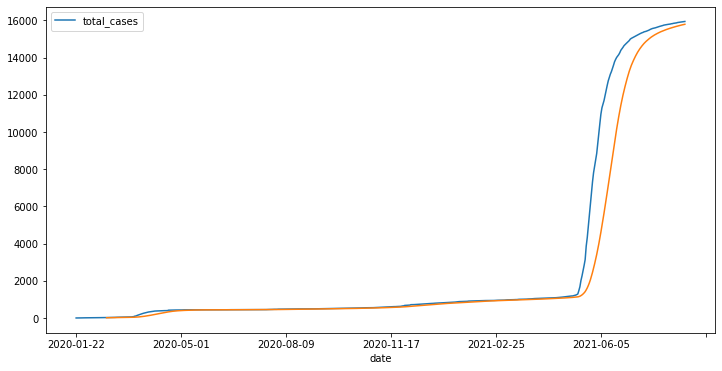

In [295]:
# 加入30天平均線
tw_total_cases.plot(figsize=(12,6))
tw_total_cases.rolling(window=30).mean()['total_cases'].plot()

In [296]:
px.line(tw_total_cases,x=tw_total_cases.index,y='total_cases')

In [297]:
# function
def plot_covid_info(country,col,y_max=1500):
    country_df = owid_df[owid_df['location'] == country][['date',col]].dropna()
    country_df.set_index('date',inplace=True)
#     country_df.drop(country_df.columns.difference([col]),1,inplace=True)
    country_df.plot(figsize=(12,6),ylim=[0,y_max])
    country_df.rolling(window=30).mean()[col].plot()

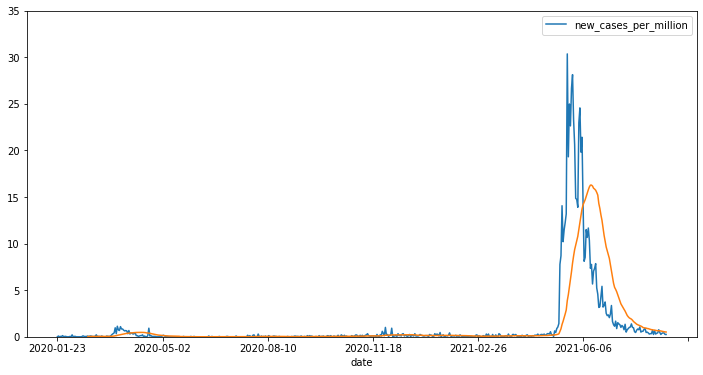

In [298]:
plot_covid_info('Taiwan','new_cases_per_million',y_max=35)

# 在台灣封城政策有效嗎?

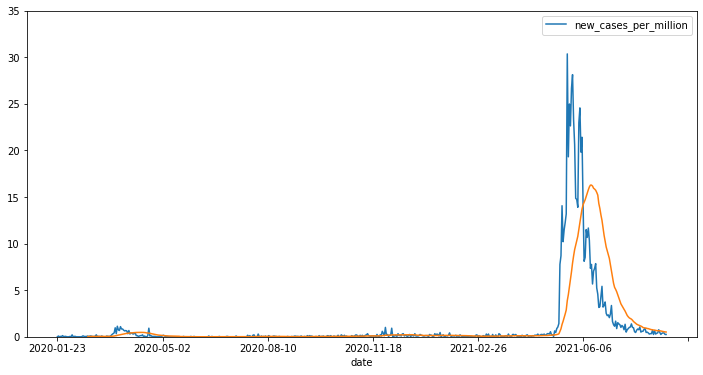

In [299]:
plot_covid_info('Taiwan','new_cases_per_million',y_max=35)

In [301]:
px.line(tw_total_cases,x=tw_total_cases.index,y='total_cases')

# 各國年紀中位數大小對死亡率的影響

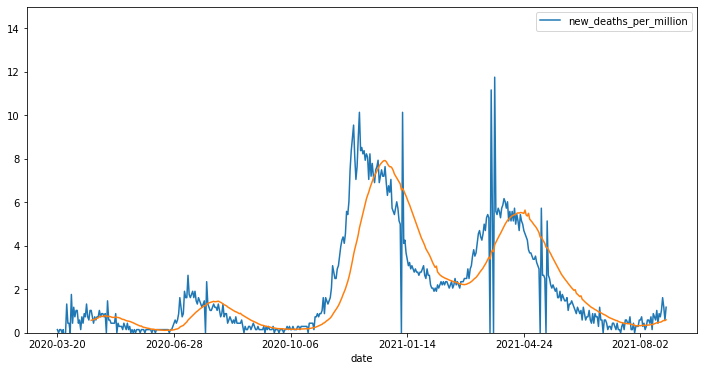

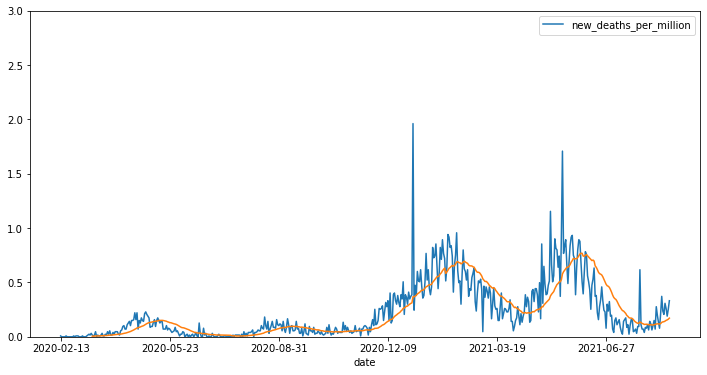

In [302]:
# 對照表示
plot_covid_info('Serbia','new_deaths_per_million',y_max=15)
plot_covid_info('Japan','new_deaths_per_million',y_max=3)

# 肥胖國家對死亡率的影響

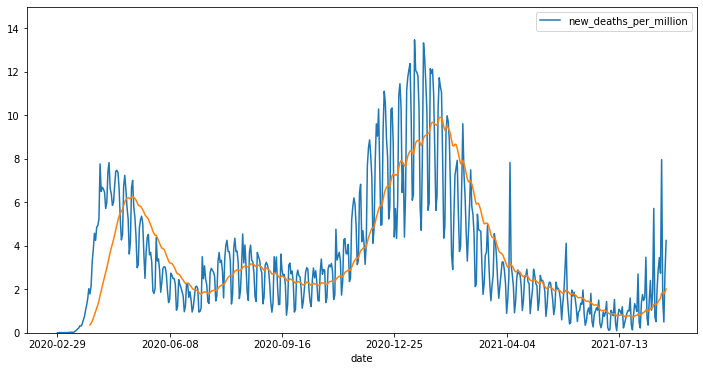

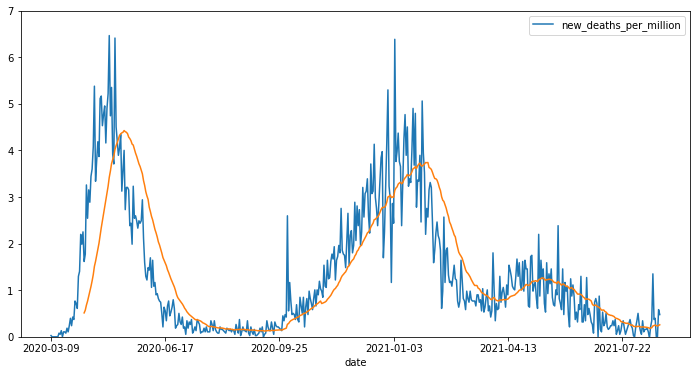

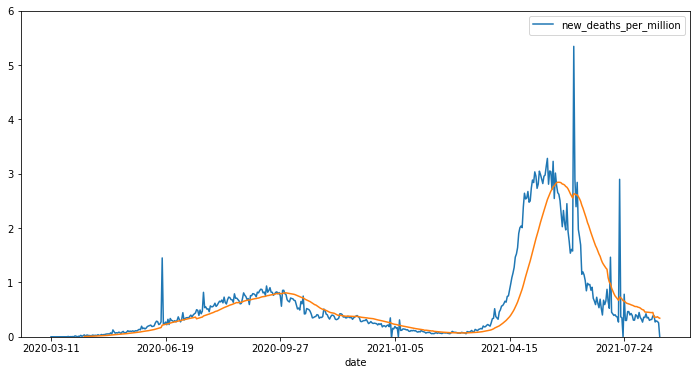

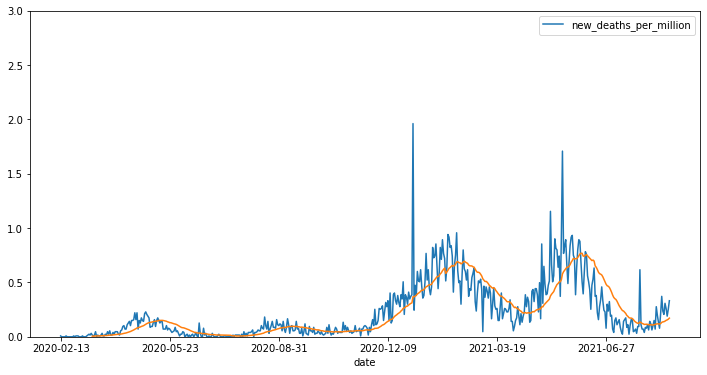

In [303]:
plot_covid_info('United States','new_deaths_per_million',y_max=15)
plot_covid_info('Canada','new_deaths_per_million',y_max=7)
plot_covid_info('India','new_deaths_per_million',y_max=6)
plot_covid_info('Japan','new_deaths_per_million',y_max=3)

# 糖尿病流行率對死亡率的影響

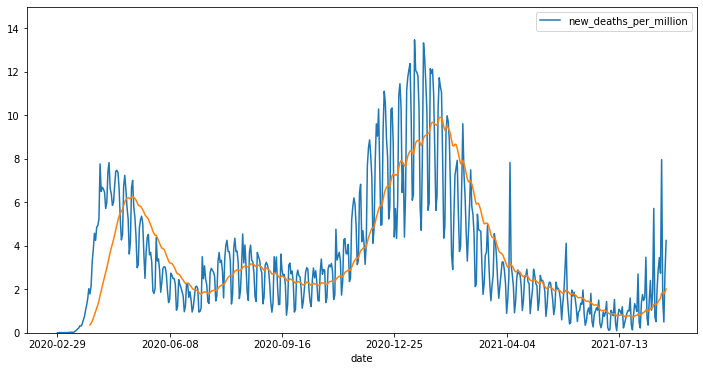

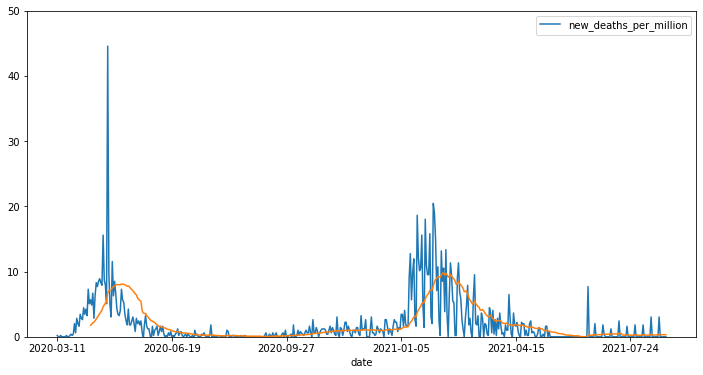

In [304]:
plot_covid_info('United States','new_deaths_per_million',y_max=15)
plot_covid_info('Ireland','new_deaths_per_million',y_max=50)

In [305]:
# 散佈圖

In [306]:
def scatter_plot(date, col1, col2):
    countries = owid_df['location'].unique()
    df = pd.DataFrame(columns = ['date', 'location', col1, col2])
    for c in countries:
        temp_df = owid_df[(owid_df['location'] == c) & (owid_df['date'] == date)][['date', 'location', col1, col2]]
        df = df.append(temp_df, ignore_index = True).fillna(0)
    df.set_index('date', inplace=True)
    
    fig = px.scatter(data_frame=df, x=col2, 
                     y=col1, color="location", trendline="ols",
                 hover_data=['location'])
    fig.show()

In [307]:
scatter_plot('2021-08-01', 'total_deaths_per_million', 'aged_70_older')